<a href="https://colab.research.google.com/github/BigM66/MLA_MLP/blob/main/MachineLearningAssignmentTemplate_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Your Name**  

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [9]:
# Include imports for Voting, Bagging, Random Forest and AdaBoost classifiers

from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

## Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [12]:
# here is the code to Load the landsat_train.csv into a data frame named landsat_train and the landsat_test.csv into a dataframe named landsat_test.

landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS-430/Hw5/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS-430/Hw5/landsat_test.csv')
landsat_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


### Statistical and Visual Exploration

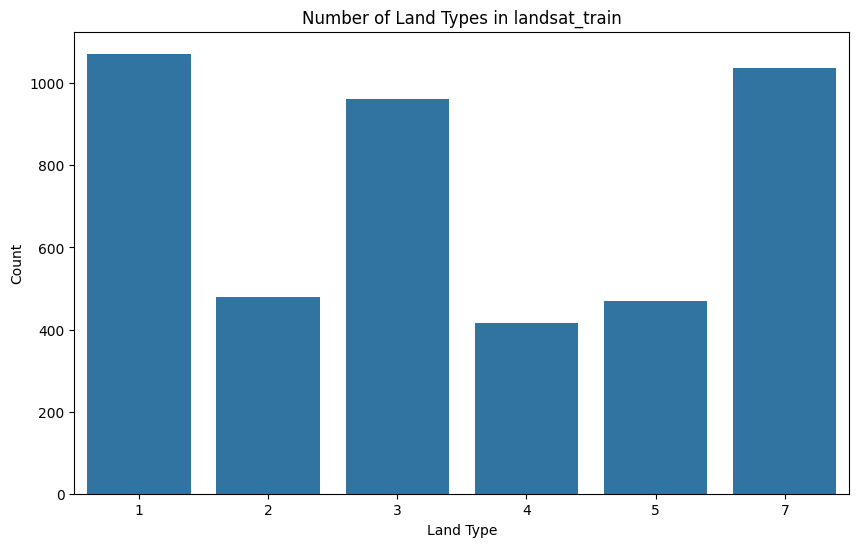

In [13]:

# Count the occurrences of each land type in landsat_train
land_type_counts_train = landsat_train['land_type'].value_counts()

# Create a bar plot for landsat_train
plt.figure(figsize=(10, 6))
sns.barplot(x=land_type_counts_train.index, y=land_type_counts_train.values)
plt.title('Number of Land Types in landsat_train')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

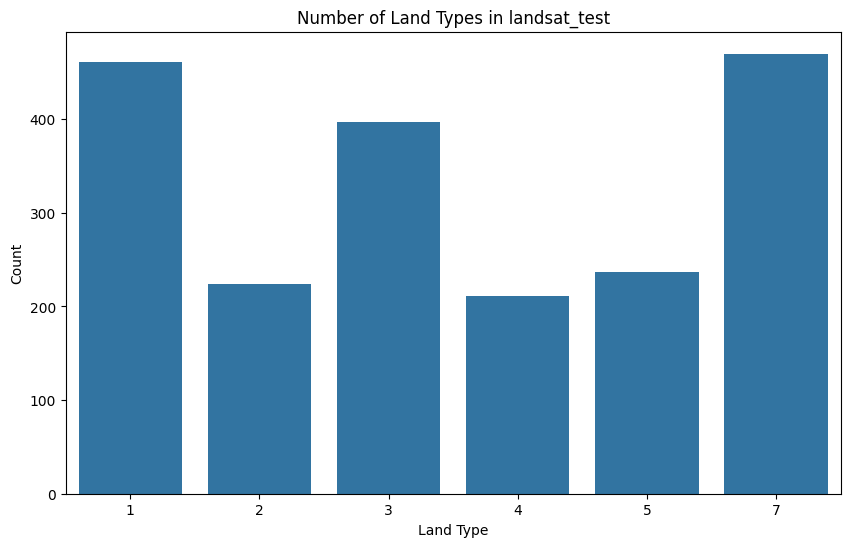

In [14]:
# Count the occurrences of each land type in landsat_test
land_type_counts_test = landsat_test['land_type'].value_counts()

# Create a bar plot for landsat_test
plt.figure(figsize=(10, 6))
sns.barplot(x=land_type_counts_test.index, y=land_type_counts_test.values)
plt.title('Number of Land Types in landsat_test')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

### Splitting Data into Train/Test

In [16]:
# split the data
X_train = landsat_train.drop('land_type', axis=1)
y_train = landsat_train['land_type']
X_test = landsat_test.drop('land_type', axis=1)
y_test = landsat_test['land_type']

### Building the Pipeline

In [17]:
# column transformer
numeric_features = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2']
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

In [18]:
# pipeline with random forrest classifier
pipeline = Pipeline(steps=[
    ('preprocessor', numeric_transformer),
    ('classifier', RandomForestClassifier())
])


### Executing the Model

In [19]:
# run pipeline
RFC = pipeline.fit(X_train, y_train)

### Evaluating Model

In [20]:
# Evaluation
y_pred = RFC.predict(X_test)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f'Precision: {prec:.2f}')
print(f'Recall: {rec:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.90
Recall: 0.88
F1 Score: 0.89


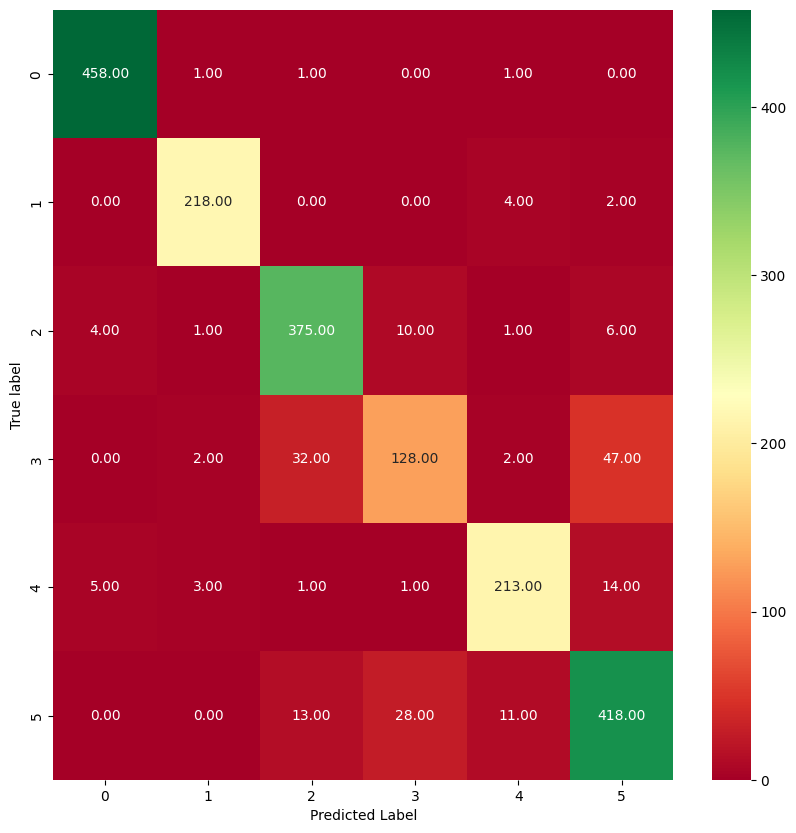

In [22]:
# confusion matrix
plot_cm(y_test, y_pred)

### Conclusion
Write a general conclusion about the results of your model.

This model using the random forrest did an alright job at predicting the type of land. It had a precission score of 0.90 which is relatively good, as we want to achieve a score as close to 1.0 as we can get. This is the same for the f1 score and the recall. We want all three of those values to be as close to 1 as possible. If all 3 were to be 1.0 exactly, then that would be a perfect model. If we examine the confusion matrix, then we can see that the land plot of 3 and the land plot of 5 must be relatively similar to one another. Other than those 2 plots of land, there is not too much confusion on our model.

#Problem 2

In [26]:
# boosting classifier pipeline
pipeline2 = Pipeline(steps=[
    ('preprocessor', numeric_transformer),
    ('classifier', AdaBoostClassifier())
])



In [27]:
# run pipeline
ABC = pipeline2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [28]:
# results
y_pred2 = ABC.predict(X_test)

prec2 = precision_score(y_test, y_pred2, average='macro')
rec2 = recall_score(y_test, y_pred2, average='macro')
f12 = f1_score(y_test, y_pred2, average='macro')
print(f'Precision: {prec2:.2f}')
print(f'Recall: {rec2:.2f}')
print(f'F1 Score: {f12:.2f}')

Precision: 0.66
Recall: 0.68
F1 Score: 0.65


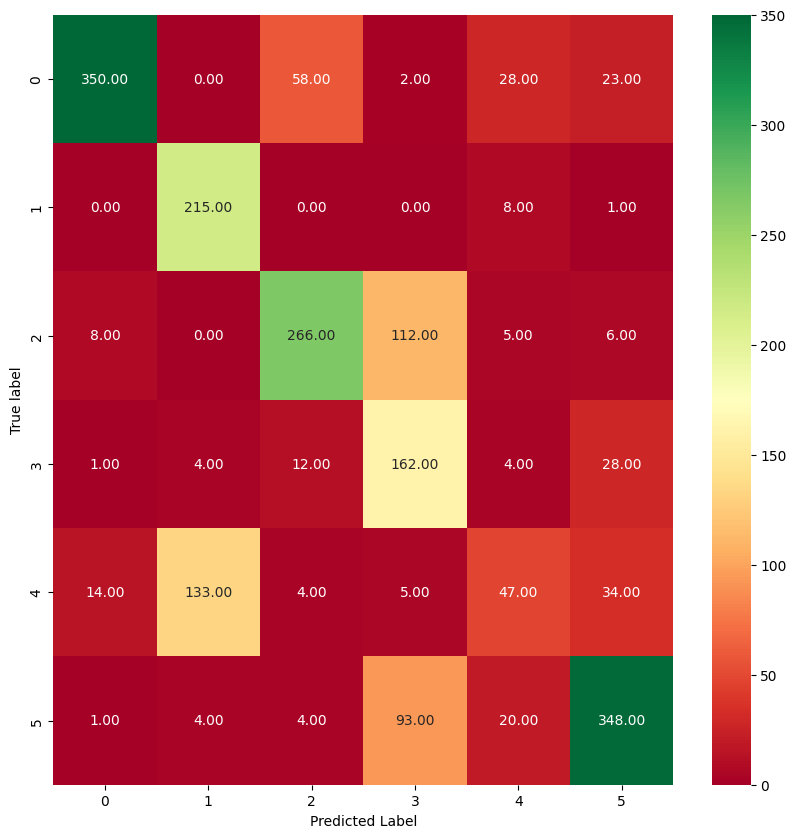

In [29]:
# confusion matrix
plot_cm(y_test, y_pred2)

# conclusion

I chose to go with the boosting classifier. This was the wromg choice as the model performed very poorly for its predictions. the recall, F1, and precision scores were all around 0.65 which is very poor. Our ideal scenario is a score of as close to 1.0 as possible. IF we look at the random tree classifier it had scores around 0.90 for all three. This model performed almost 25 percent worse than the random tree classifier. If we look at the confusion matrix, we can see that it had a great deal of problems with identifying the difference between land plots 1 and 4, with almost 135 incorrect guesses of a 1 when it was in fact 4. Land plot 4 in general it had a hard time guessing as it has the most incorrect guesses out of all the land plots



```
```

## Problem 3


### Reading the Data

In [33]:
# import data
bank = pd.read_csv('/content/gdrive/MyDrive/CS-430/Hw5/banknote_authentication (2).csv')
bank.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Splitting Data into Train/Test

In [37]:
# split data
X = bank.drop('forgery', axis=1)
y = bank['forgery']

### Building the Pipeline

In [34]:
# column transformer
numeric_features = ['variance', 'skewness', 'curtosis', 'entropy']
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

In [35]:
# pipeline with random tree
pipeline3 = Pipeline(steps=[
    ('preprocessor', numeric_transformer),
    ('classifier', RandomForestClassifier())
])

### Executing the Model

In [38]:
# running model
RFC3 = pipeline3.fit(X, y)

### Evaluating Model

In [39]:
# evaulation
y_pred3 = RFC3.predict(X)
prec3 = precision_score(y, y_pred3)
rec3 = recall_score(y, y_pred3)
f13 = f1_score(y, y_pred3)
print(f'Precision: {prec3:.2f}')
print(f'Recall: {rec3:.2f}')
print(f'F1 Score: {f13:.2f}')

Precision: 1.00
Recall: 1.00
F1 Score: 1.00


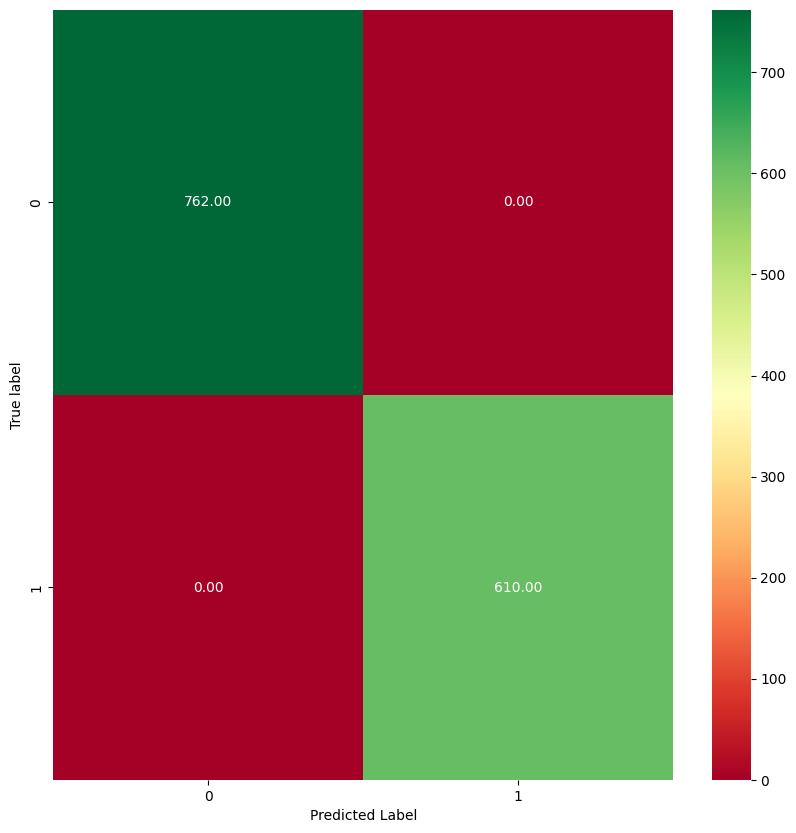

In [40]:
# confusion matrix
plot_cm(y, y_pred3)

### Conclusion
Write a general conclusion about the results of your model.

The random tree classifier was the absolute best model we could have used. The ideal model is that we have a recall, F1, and precision scores of 1.0. For the random tree model that is exactly what we have is all three have a score of 1.0.The confusion matrix confirms all of the scores, as we can see that there were no false postives and no true negatives. Which means that our model had perfect accuracy.